# Google Play Store Dataset – Data Overview & Quality Analysis

### Univariate & Bivariate EDA

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [120]:
df = pd.read_csv("C:\\Users\\anura\\Downloads\\googleplaystore_cleaned_interim.xls")
os.makedirs('reports/figures', exist_ok=True)
df.shape

(9638, 17)

In [121]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB,Log_Reviews,Log_Installs,Reviews_z
0,facebook,social,4.1,78158306.0,NaN,1.000000e+09,Free,0.0,teen,social,2018-08-03,varies with device,varies with device,NaN,18.174247,20.723266,42.528864
1,whatsapp messenger,communication,4.4,69119316.0,NaN,1.000000e+09,Free,0.0,everyone,communication,2018-08-03,varies with device,varies with device,NaN,18.051345,20.723266,37.596732
2,instagram,social,4.5,66577446.0,NaN,1.000000e+09,Free,0.0,teen,social,2018-07-31,varies with device,varies with device,NaN,18.013876,20.723266,36.209758
3,messenger – text and video chat for free,communication,4.0,56646578.0,NaN,1.000000e+09,Free,0.0,everyone,communication,2018-08-01,varies with device,varies with device,NaN,17.852342,20.723266,30.790973
4,clash of clans,game,4.6,44893888.0,98m,1.000000e+08,Free,0.0,everyone 10+,strategy,2018-07-15,10.322.16,4.1 and up,98.0,17.619812,18.420681,24.378108


In [122]:
df.describe()

,Rating,Reviews,Installs,Price,Size_MB,Log_Reviews,Log_Installs,Reviews_z
count,9638.000000,9.638000e+03,9.638000e+03,9638.000000,8412.000000,9638.000000,9638.000000,9.638000e+03
mean,4.193028,2.167621e+05,7.804542e+06,1.014441,20.422131,6.839569,10.705648,3.538706e-17
std,0.496006,1.832769e+06,5.381895e+07,15.883630,21.842204,4.178207,4.374899,1.000052e+00
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.008301,0.000000,0.000000,-1.182764e-01
25%,4.000000,2.500000e+01,1.000000e+03,0.000000,4.600000,3.258097,6.908755,-1.182628e-01
50%,4.300000,9.785000e+02,1.000000e+05,0.000000,12.000000,6.887042,11.512935,-1.177425e-01
75%,4.500000,2.953125e+04,1.000000e+06,0.000000,28.000000,10.293238,13.815512,-1.021626e-01
max,5.000000,7.815831e+07,1.000000e+09,400.000000,100.000000,18.174247,20.723266,4.252886e+01


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9638 entries, 0 to 9637
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9638 non-null   object 
 1   Category        9638 non-null   object 
 2   Rating          9638 non-null   float64
 3   Reviews         9638 non-null   float64
 4   Size            8412 non-null   object 
 5   Installs        9638 non-null   float64
 6   Type            9638 non-null   object 
 7   Price           9638 non-null   float64
 8   Content Rating  9638 non-null   object 
 9   Genres          9638 non-null   object 
 10  Last Updated    9638 non-null   object 
 11  Current Ver     9630 non-null   object 
 12  Android Ver     9636 non-null   object 
 13  Size_MB         8412 non-null   float64
 14  Log_Reviews     9638 non-null   float64
 15  Log_Installs    9638 non-null   float64
 16  Reviews_z       9638 non-null   float64
dtypes: float64(8), object(9)
memory u

### Univariate Analysis – Numerical Variables

#### This histogram with a Kernel Density Estimate (KDE) visualizes the distribution of app install counts.It helps identify how downloads are spread across apps and whether installs are evenly distributed or concentrated among a few apps.


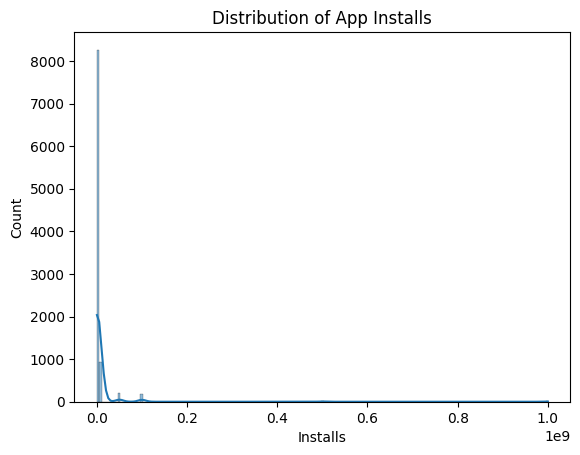

In [124]:
plt.figure()
sns.histplot(df['Installs'],kde = True)
plt.title('Distribution of App Installs')
plt.savefig('reports/figures/installs_hist.png')
plt.show()

**Key Insights:**
- App installs are **highly right-skewed**, where the majority of apps have relatively low install counts.
- A small number of apps have **extremely high installs**, forming a long right tail.
- Most apps are clustered near the lower end of the install scale, indicating limited reach for the average app.
- The KDE curve confirms that installs are not normally distributed.


#### This histogram with a Kernel Density Estimate (KDE) visualizes the distribution of app ratings in the dataset. It helps understand how ratings are spread across apps and whether most apps receive low, average, or high ratings.


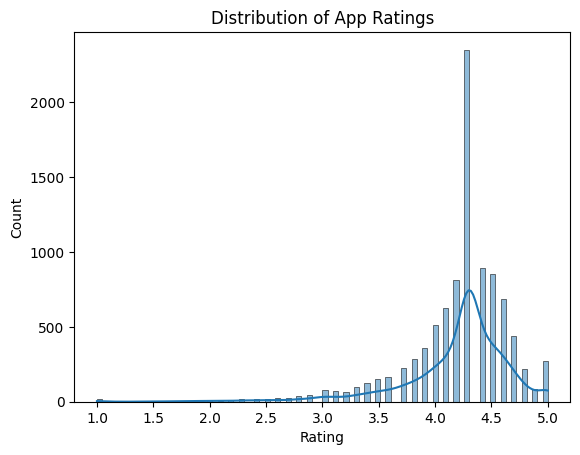

In [125]:
plt.figure()
sns.histplot(df['Rating'],kde = True)
plt.title('Distribution of App Ratings')
plt.savefig('reports/figures/rating_hist_kde.png')
plt.show()

**Key Insights:**
- App ratings are heavily concentrated between **4.0 and 4.5**, indicating generally positive user feedback.
- The distribution is **left-skewed**, with relatively fewer apps having ratings below 3.0.
- A sharp peak around **4.2–4.4** suggests many apps cluster around similar high ratings.
- Very low-rated apps (< 2.0) are rare, which may indicate survivorship bias or removal of poor-quality apps from the store.

#### This boxplot visualizes the distribution of app ratings and highlights the median, interquartile range (IQR), and potential outliers.It helps identify unusually low or high ratings and assess the overall spread of user feedback.


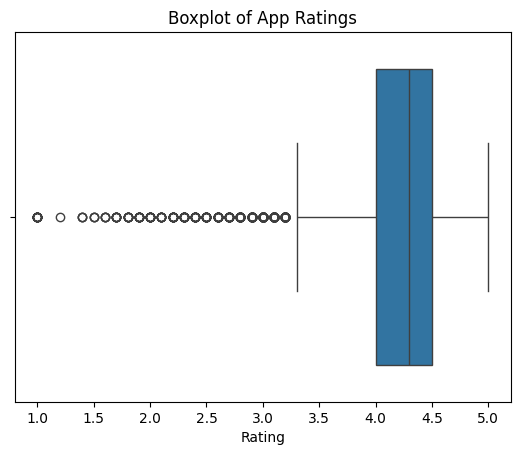

In [126]:
plt.figure()
sns.boxplot(x=df['Rating'])
plt.title('Boxplot of App Ratings')
plt.savefig('reports/figures/rating_boxplot.png')
plt.show()

**Key Insights:**
- The median app rating lies around **4.2**, indicating generally positive user feedback.
- Most app ratings are tightly clustered between **4.0 and 4.5**, showing low variability among the majority of apps.
- Several **low-rating outliers** exist below 3.0, which may represent poor-quality or niche apps.
- Very few extreme high outliers are present, as ratings are capped at 5.

### Categorical Univariate Analysis

#### This bar chart displays the top 10 most frequent app categories in the Google Play Store dataset.It helps understand how apps are distributed across categories and identifies highly competitive segments.

* App category frequency

In [127]:
category_counts = df['Category'].value_counts()
category_counts.head()

Category
family      1872
game         943
tools        826
business     419
medical      394
Name: count, dtype: int64

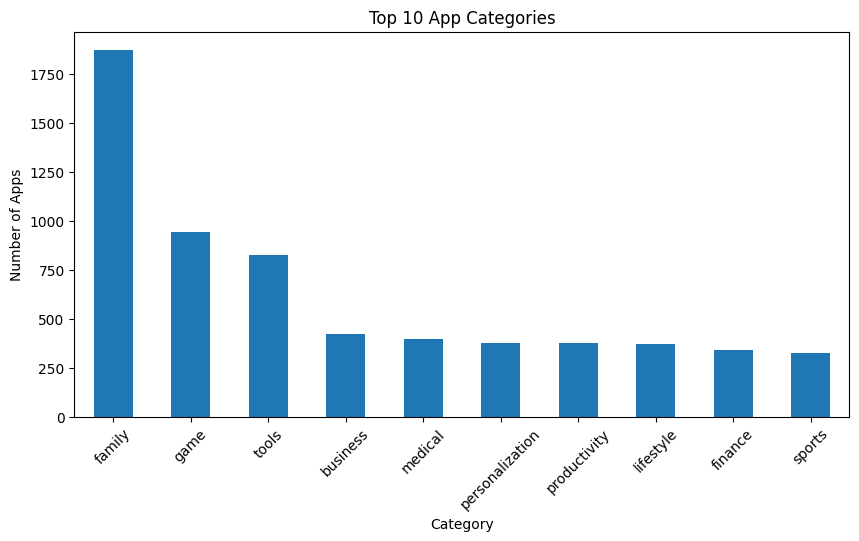

In [128]:
plt.figure(figsize=(10,5))
category_counts.head(10).plot(kind='bar')
plt.title('Top 10 App Categories')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.savefig('reports/figures/category_bar.png')
plt.show()

**Key Insights:**
- The **Family** category has the highest number of apps, making it the most saturated category.
- **Game** and **Tools** categories also have a high concentration of apps.
- Business and Medical categories have comparatively fewer apps.
- App distribution across categories is uneven, indicating varying levels of competition.

#### This bar chart compares the number of free and paid apps available in the Google Play Store dataset.It highlights the pricing strategy distribution across apps.

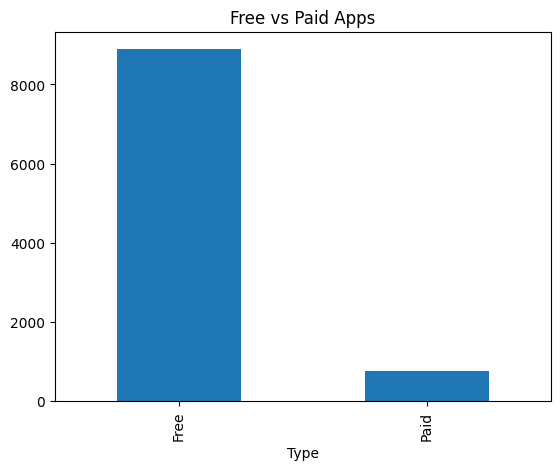

In [129]:
plt.figure()
df['Type'].value_counts().plot(kind='bar')
plt.title('Free vs Paid Apps')
plt.savefig('reports/figures/type_bar.png')
plt.show()

**Key Insights:**
- Free apps significantly outnumber paid apps.
- Paid apps represent only a small fraction of the total app population.
- The app ecosystem is heavily dominated by free-to-use applications.

### Numeric-Numeric Analysis

### Does app size impact ratings or installs?

#### The scatter plot shows the relationship between app size (in MB) and user ratings. Each point represents a single app.

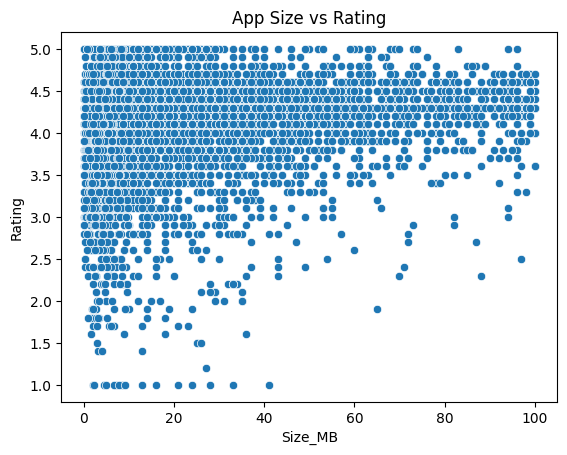

In [130]:
plt.figure()
sns.scatterplot(x='Size_MB', y='Rating', data=df)
plt.title('App Size vs Rating')
plt.savefig('reports/figures/size_vs_rating.png')
plt.show()

**Key Insights:**
- There is no strong linear relationship between app size and user rating.
- Apps of all sizes receive a wide range of ratings.
- Most apps cluster between ratings of 3.5 and 4.5 regardless of size.
- Smaller apps tend to show greater variability in ratings.
- Larger apps rarely receive very low ratings.


#### This scatter plot visualizes the relationship between app size (MB) and the number of installs. A logarithmic scale is applied to installs to handle the heavy right-skewed distribution.


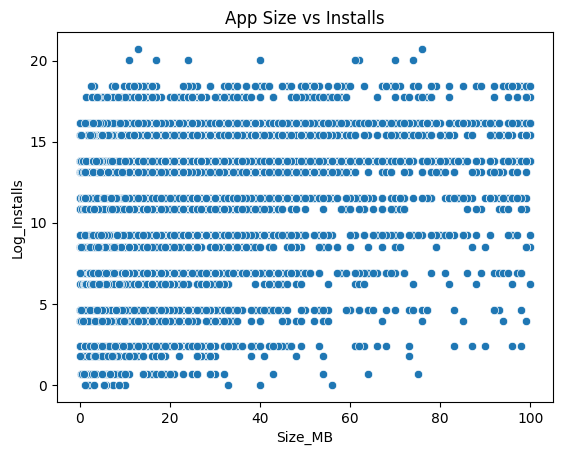

In [131]:
plt.figure()
sns.scatterplot(x='Size_MB', y='Log_Installs', data=df)
plt.title('App Size vs Installs')
plt.savefig('reports/figures/size_vs_installs.png')
plt.show()

**Key Insights:**
- There is no strong linear relationship between app size and installs.
- Highly installed apps exist across a wide range of sizes.
- Install values appear in horizontal bands due to categorical install buckets.
- Most high-install apps fall within a moderate size range (10–60 MB).


#### This scatter plot shows the relationship between app ratings and the logarithm of review counts. Log transformation is applied to reviews to handle skewness and improve visual interpretability.


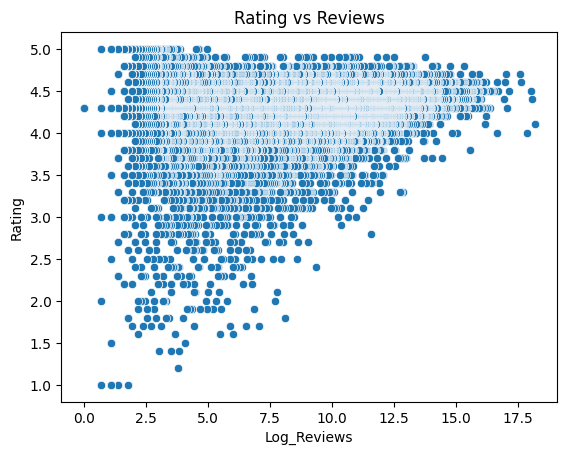

In [132]:
plt.figure()
sns.scatterplot(x='Log_Reviews', y='Rating', data=df)
plt.title('Rating vs Reviews')
plt.savefig('reports/figures/rating_vs_reviews.png')
plt.show()

**Key Insights:**
- A positive relationship exists between the number of reviews and app ratings.
- Apps with a large number of reviews tend to maintain ratings above 4.0.
- Ratings show high variability for apps with few reviews, indicating early-stage noise.
- Ratings stabilize as review count increases, suggesting higher reliability.


#### Correlation Heatmap

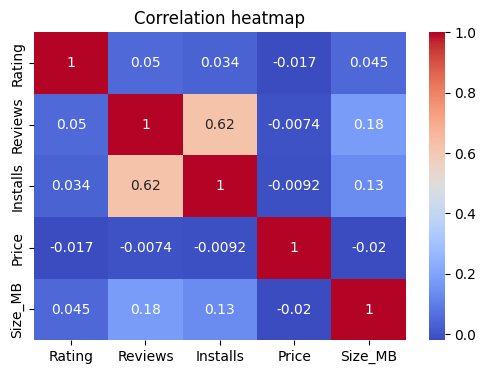

In [133]:
corr = df[['Rating','Reviews','Installs','Price','Size_MB']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr , annot = True, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.savefig('reports/figures/correlation_heatmap.png')
plt.show()

**Correlation Analysis Insights:**

- A strong positive correlation (0.62) exists between installs and reviews, indicating that more popular apps receive significantly more user feedback.
- App ratings show very weak correlation with installs, reviews, price, and app size, suggesting ratings are largely independent of popularity and monetization.
- App size has a weak positive relationship with installs and reviews, indicating only a minor influence.
- App price does not exhibit any meaningful correlation with installs, reviews, or ratings.


### Numeric-Categorical Analysis

#### Comparison of App Ratings: Free vs Paid Apps

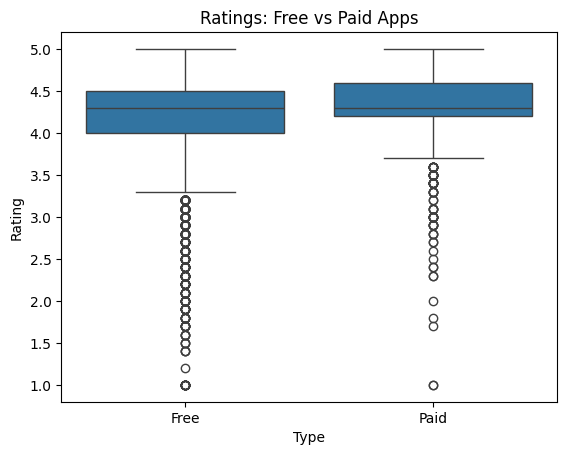

In [134]:
plt.figure()
sns.boxplot(x='Type', y='Rating', data=df)
plt.title('Ratings: Free vs Paid Apps')
plt.savefig('reports/figures/rating_by_type.png')
plt.show()

**Ratings by App Type – Insights:**

- Paid apps have a slightly higher median rating compared to free apps.
- Free apps show greater variability in ratings and a higher number of low-rating outliers.
- The difference in ratings between free and paid apps is modest, indicating that price is not a strong driver of user satisfaction.


#### Install Distribution: Free vs Paid Apps (Log Scale)

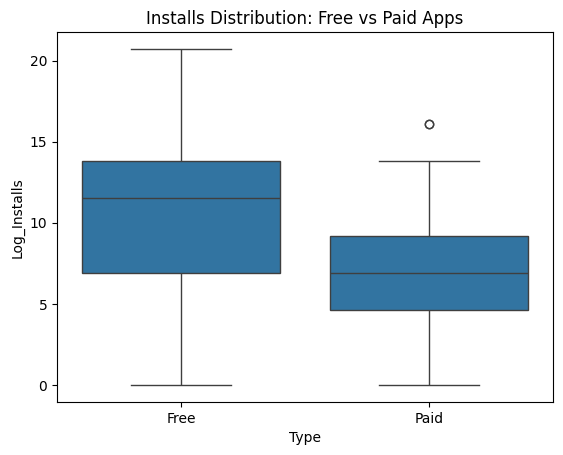

In [135]:
plt.figure()
sns.boxplot(x='Type', y='Log_Installs', data=df)
plt.title('Installs Distribution: Free vs Paid Apps')
plt.show()

**Key Insights:**
- Free apps have a significantly higher median number of installs compared to paid apps.
- The install distribution is highly right-skewed, with a small number of free apps achieving extremely high download counts.
- Paid apps tend to have lower and more concentrated install ranges, indicating limited mass adoption.
- Log transformation helps visualize differences more clearly by compressing extreme install values.


#### Average Installs by Category (Top 10)


##### This bar chart shows the top 10 app categories based on their average number of installs.  Categories are sorted in descending order to highlight which types of apps achieve higher user reach.

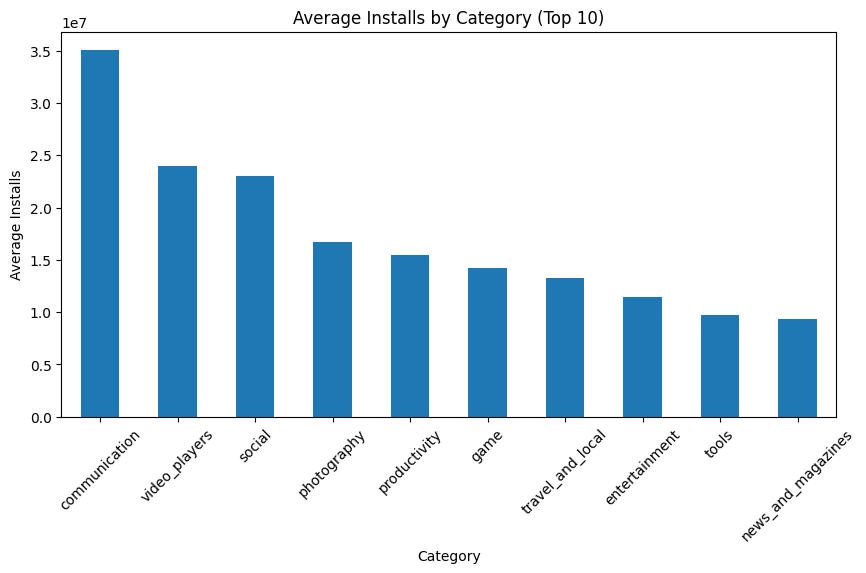

In [136]:
category_installs = df.groupby('Category')['Installs'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
category_installs.plot(kind='bar')
plt.title('Average Installs by Category (Top 10)')
plt.ylabel('Average Installs')
plt.xticks(rotation=45)
plt.savefig('reports/figures/installs_by_category.png')
plt.show()

**Key Insights:**
- Categories such as Communication, Video Players, and Social apps have the highest average installs.
- These categories significantly outperform others, indicating strong user demand and frequent usage.
- The difference between top and bottom categories is substantial, highlighting uneven market distribution.

#### Top 10 Categories by Average Rating

##### This bar chart represents the top 10 app categories based on their average user ratings. It helps identify categories that consistently deliver higher user satisfaction.

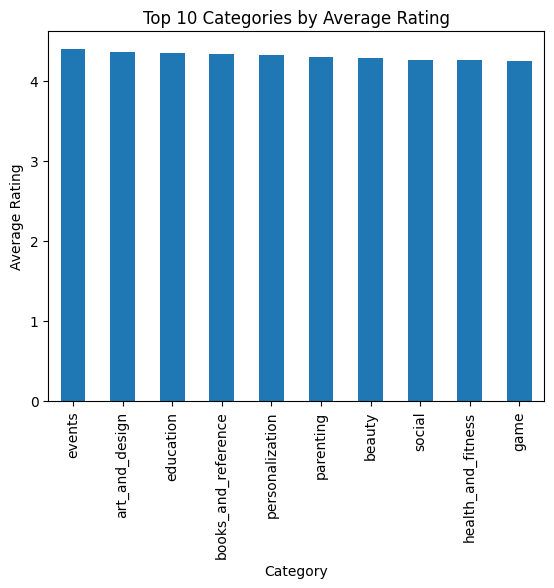

In [137]:
avg_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

avg_rating.head(10).plot(kind='bar')
plt.title('Top 10 Categories by Average Rating')
plt.ylabel('Average Rating')
plt.show()

**Key Insights:**
- Categories such as Events, Design, and Education have the highest average ratings.
- Most top-performing categories have ratings above 4.2, indicating generally high user satisfaction.
- Rating differences across categories are relatively small compared to installs, suggesting quality is consistent across domains.

### Segment Analysis

#### Average Rating by Content Rating

##### This bar chart compares the average app rating across different content rating segmentssuch as Teen, Everyone, and 18+. It helps assess whether content restrictions influence user satisfaction.

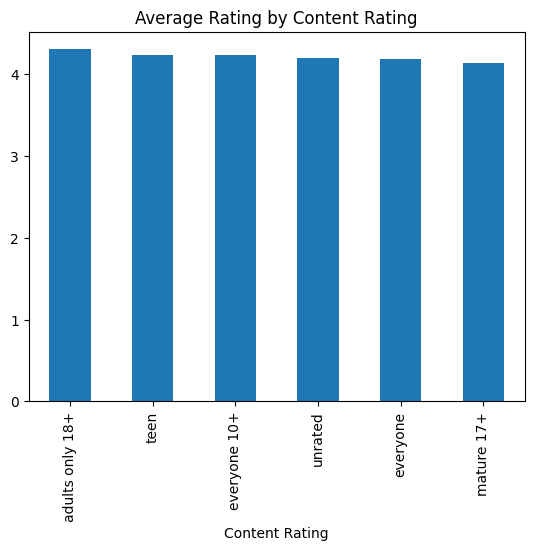

In [138]:
content_segment = df.groupby('Content Rating')['Rating'].mean().sort_values(ascending=False)
plt.figure()
content_segment.plot(kind='bar')
plt.title('Average Rating by Content Rating')
plt.savefig('reports/figures/rating_by_content.png') 
plt.show()

**Key Insights**
- Apps rated 18+ and Teen show slightly higher average ratings compared to other segments.
- Differences in average ratings across content ratings are relatively small.
- This suggests that content rating alone does not strongly determine app quality perception.\